In [1]:
import pandas as pd

In [2]:
triplets = pd.read_json('data/poet_triplets.json')
triplets.head()

,source,edge,destination
0,"{'name': 'Bencze József', 'wiki_url': '/wiki/B...","{'wikidata_id': 'P31', 'name': 'osztály, amely...","{'wikidata_id': 'Q5', 'name': 'ember', 'descri..."
1,"{'name': 'Bencze József', 'wiki_url': '/wiki/B...","{'wikidata_id': 'P21', 'name': 'nem', 'descrip...","{'wikidata_id': 'Q6581097', 'name': 'férfi', '..."
2,"{'name': 'Bencze József', 'wiki_url': '/wiki/B...","{'wikidata_id': 'P735', 'name': 'utónév', 'des...","{'wikidata_id': 'Q17498051', 'name': 'József',..."
3,"{'name': 'Bencze József', 'wiki_url': '/wiki/B...","{'wikidata_id': 'P570', 'name': 'halálozási id...","{'time': '+1988-02-02T00:00:00Z', 'timezone': ..."
4,"{'name': 'Bencze József', 'wiki_url': '/wiki/B...","{'wikidata_id': 'P106', 'name': 'foglalkozás',...","{'wikidata_id': 'Q49757', 'name': 'költő', 'de..."


In [5]:
edges = triplets.edge.apply(lambda d: d['name'])

In [21]:
edges.groupby(by=edges).count().sort_values(ascending=False)[:100].index

Index(['foglalkozás', 'osztály, amelynek példánya', 'születési idő', 'nem',
       'utónév', 'születési hely', 'halálozási idő', 'description',
       'állampolgárság', 'VIAF-azonosító', '', 'WorldCat-azonosító', 'ISNI',
       'díj', 'halálozási hely', 'PIM-névtér-azonosító', 'LCAuth-azonosító',
       'családnév', 'OSZK-egységesítettnévalak', 'OSZK-azonosító (VIAF)',
       'Magyar életrajzi lexikon-azonosító', 'kép', 'alias', 'beszélt nyelvek',
       'Commons-kategória', 'GND-azonosító', 'leírást tartalmazó forrás',
       'NUKAT-azonosító', 'BnF-azonosító', 'NTA-azonosító', 'alma mater',
       'FAST-azonosító', 'Lengyel Nemzeti Könyvtár-azonosító', 'nyughely',
       'NKC-azonosító', 'SUDOC-azonosító', 'tagság', 'vallás',
       'Open Library-azonosító', 'munkáltató', 'Freebase-azonosító',
       'házastárs', 'Magyar Nemzeti Névtér-személyazonosító',
       'Google Tudásgráf-azonosító', 'nyughely képe', 'születési név',
       'PORT.hu-személyazonosító', 'gyermek', 'CERL-azonosít

In [3]:
l = ['foglalkozás', 'születési idő', 'nem', 'születési hely', 'halálozási idő', 'állampolgárság', 'díj', 'halálozási hely', 'alias', 'beszélt nyelvek', 'születési név', 'nyughely', 'vallás', 'gyermek', 'tagság', 'halál oka', 'apa', 'testvér', 'anya', 'politikai párt']

In [5]:
dict(set([('_'.join(d['name'].split()), d['wikidata_id']) for d in triplets.edge.tolist() if d['name'] in l]))

{'halálozási_hely': 'P20',
 'halál_oka': 'P509',
 'születési_idő': 'P569',
 'testvér': 'P3373',
 'foglalkozás': 'P106',
 'anya': 'P25',
 'születési_hely': 'P19',
 'beszélt_nyelvek': 'P1412',
 'születési_név': 'P1477',
 'nem': 'P21',
 'politikai_párt': 'P102',
 'gyermek': 'P40',
 'nyughely': 'P119',
 'apa': 'P22',
 'díj': 'P166',
 'alias': None,
 'állampolgárság': 'P27',
 'vallás': 'P140',
 'tagság': 'P463',
 'halálozási_idő': 'P570'}

In [50]:
print('\n- intent: '.join(['_'.join(i.split()) for i in l]))

foglalkozás
- intent: születési_idő
- intent: nem
- intent: születési_hely
- intent: halálozási_idő
- intent: állampolgárság
- intent: díj
- intent: halálozási_hely
- intent: alias
- intent: beszélt_nyelvek
- intent: születési_név
- intent: nyughely
- intent: vallás
- intent: gyermek
- intent: tagság
- intent: halál_oka
- intent: apa
- intent: testvér
- intent: anya
- intent: politikai_párt


In [24]:
len(l)

20

In [30]:
f = triplets[triplets.edge.apply(lambda d: d['name'] in l)]

In [33]:
f.source.apply(lambda d: d['name']).nunique()

2019

<AxesSubplot:xlabel='source'>

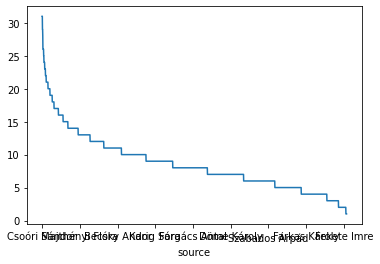

In [40]:
fs = f.source.apply(lambda d: d['name'])

fs.groupby(by=fs).count().sort_values(ascending=False).plot()

In [47]:
fe = f.edge.apply(lambda d: d['name'])

fe.groupby(by=fe).count()

edge
alias               561
anya                 30
apa                  99
beszélt nyelvek     558
díj                1143
foglalkozás        4289
gyermek             139
halál oka            41
halálozási hely    1057
halálozási idő     1463
nem                2029
nyughely            297
politikai párt       35
születési hely     1574
születési idő      2029
születési név       141
tagság              222
testvér              98
vallás              217
állampolgárság     1365
Name: edge, dtype: int64

In [42]:
edges

0                osztály, amelynek példánya
1                                       nem
2                                    utónév
3                            halálozási idő
4                               foglalkozás
                        ...                
41276                            alma mater
41277                       gyermekek száma
41278                       NUKAT-azonosító
41279            Google Tudásgráf-azonosító
41280    Lengyel Nemzeti Könyvtár-azonosító
Name: edge, Length: 41281, dtype: object

In [51]:
f['edge_name'] = f.edge.apply(lambda d: d['name'])
f['source_name'] = f.source.apply(lambda d: d['name'])

<ipython-input-51-ed5bf586256d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['edge_name'] = f.edge.apply(lambda d: d['name'])
<ipython-input-51-ed5bf586256d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f['source_name'] = f.source.apply(lambda d: d['name'])


In [55]:
fc = f.groupby(by='edge_name').source_name.apply(list)
fc

edge_name
alias              [Blázy János, Blázy János, Fenyő László, Fenyő...
anya               [Makkai Ádám, Fábri Péter, Kovács András Feren...
apa                [Fekete János, Horusitzky Zoltán, Makkai Ádám,...
beszélt nyelvek    [Szokolay Zoltán, Orbán Ottó, Ján Andrej Demia...
díj                [Szokolay Zoltán, Szokolay Zoltán, Szokolay Zo...
foglalkozás        [Bencze József, Erg Ágoston, Erg Ágoston, Szok...
gyermek            [Chernel Ferenc, Fábri Pál, Makkai Ádám, Maksa...
halál oka          [Szenes Hanna, Arany János, Nagy László, Károl...
halálozási hely    [Bencze József, Blázy János, Orbán Ottó, Zakar...
halálozási idő     [Bencze József, Erg Ágoston, Szokolay Zoltán, ...
nem                [Bencze József, Erg Ágoston, Szokolay Zoltán, ...
nyughely           [Kacsó Sándor, Toldalagi Pál, Bajor Andor, Roz...
politikai párt     [Szokolay Zoltán, Szokolay Zoltán, Csoóri Sánd...
születési hely     [Bencze József, Erg Ágoston, Szokolay Zoltán, ...
születési idő      [Benc

In [60]:
from random import sample

fc_samp = fc.apply(lambda l: sample(l, 30))

In [72]:
res = []

for i, (edge, ll) in fc_samp.reset_index().iterrows():
    for l in ll:
        res.append([edge, l, f'[{l}]'])

In [73]:
# pd.DataFrame(res, columns=['edge', 'source', 'q']).to_excel('data/annotate.xls')

<ipython-input-73-3f8a7311cb25>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  pd.DataFrame(res, columns=['edge', 'source', 'q']).to_excel('data/annotate.xls')


In [75]:
triplets[triplets.edge.apply(lambda d: d['name'] == 'alias')]

,source,edge,destination
109,"{'name': 'Blázy János', 'wiki_url': '/wiki/Bl%...","{'name': 'alias', 'wikidata_id': None}",Idősebb Blázy János
110,"{'name': 'Blázy János', 'wiki_url': '/wiki/Bl%...","{'name': 'alias', 'wikidata_id': None}",Id. Blahoszlav János
201,"{'name': 'Fenyő László', 'wiki_url': '/wiki/Fe...","{'name': 'alias', 'wikidata_id': None}",László Fenyő
202,"{'name': 'Fenyő László', 'wiki_url': '/wiki/Fe...","{'name': 'alias', 'wikidata_id': None}",Friedmann László
289,"{'name': 'Ján Andrej Demian', 'wiki_url': '/wi...","{'name': 'alias', 'wikidata_id': None}",Demián János András
...,...,...,...
41189,"{'name': 'Balázs F. Attila', 'wiki_url': '/wik...","{'name': 'alias', 'wikidata_id': None}",Attila Balázs F.
41190,"{'name': 'Balázs F. Attila', 'wiki_url': '/wik...","{'name': 'alias', 'wikidata_id': None}",Attila Balazs
41191,"{'name': 'Balázs F. Attila', 'wiki_url': '/wik...","{'name': 'alias', 'wikidata_id': None}",Attila Balazs F.
41239,"{'name': 'Grecsó Krisztián', 'wiki_url': '/wik...","{'name': 'alias', 'wikidata_id': None}",Krisztián Grecsó


In [5]:
import pandas as pd

In [7]:
annotated = pd.read_excel('data/annotate_parially_done.xls')

In [10]:
annotated_filt = annotated[annotated.q.apply(lambda s: s.endswith('?'))]

In [23]:
annotated_filt['q_filt'] = annotated_filt.q.str.replace('\[.*\]', 'MASK', regex=True).str.lower()

<ipython-input-23-ab53f6e32ce2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotated_filt['q_filt'] = annotated_filt.q.str.replace('\[.*\]', 'MASK', regex=True).str.lower()


In [28]:
ann_dict = annotated_filt.groupby(by='edge').q_filt.apply(list).to_dict()

In [36]:
ann_lst = list(ann_dict.items())

In [40]:
ann_lst

[('alias',
  ['mi mask álneve?',
   'milyen álnéven alkotott mask?',
   'milyen néven ismert még mask?',
   'milyen néven ismert még mask?',
   'mi mask álneve?',
   'mask milyen neveken írt?',
   'mi mask alkotói neve?',
   'milyen néven ismert még mask?',
   'mik mask álnevei?',
   'mi mask másik neve?',
   'milyen néven ismert mask?',
   'mask más ismert nevei?',
   'mask egyéb nevei?',
   'milyen néven ismert még mask?',
   'hogy nevezik maskt más nevén?',
   'milyen néven ismert még mask?',
   'mask más nevei?',
   'mask egyéb ismert nevei?',
   'milyen nevei vannak még masknek?']),
 ('anya',
  ['ki mask anyja?',
   'ki mask édesanyja?',
   'hogy hívják mask édesanyját?',
   'hogy hívták mask édesanyját?',
   'ki volt mask édesanyja?',
   'ki mask anyukája?',
   'mi mask édesanyjának neve?',
   'ki volt mask anyja?',
   'ki az anyja masknak?',
   'hogy hívják mask anyját?',
   'ki az édesanyja masknak?',
   'ki mask édesanyja?',
   'mi mask anyjának neve?',
   'mi mask édesanyjána

In [41]:
import yaml

f = open('data/annotated.yaml', 'w+')

yaml.dump(ann_dict, f, allow_unicode=True)